In [20]:
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)
library(pheatmap)
library(stringr)
library(lme4)

In [ ]:
# Load required data frames
data <- fread("../data/processed_E-MTAB-4840-query-results.tpms.tsv", sep = "\t")
df_subset <- fread("../data/data_subset.tsv", sep = "\t")

# Summary statistics for the gene expression values

In [21]:
# Apply the summary function to each column and store the results in a list
summary_values <- lapply(data[, -c(1,2), with = FALSE], summary)

# Create a new data table to store the summary values
summary_table <- data.table(matrix(ncol = length(summary_values), nrow = 6))

# Set the column names of the summary table to match the samples in the data
setnames(summary_table, names(summary_values))

# Set the row names of the summary table to match the summary statistics
setattr(summary_table, "row.names", names(summary_values[[1]]))

# Fill the summary table with the summary values
for (i in seq_along(summary_values)) {
  summary_table[, i] <- summary_values[[i]]
}

head(summary_table, 5)

# Save the summary table
write.table(summary_table, "../results/eda/data_summary.tsv", sep = "\t", row.names = TRUE)            

"10 post conception weeks, basal ganglion","10 post conception weeks, brain fragment","10 post conception weeks, cerebellum","10 post conception weeks, cerebral cortex","10 post conception weeks, choroid plexus","10 post conception weeks, diencephalon","10 post conception weeks, forebrain","10 post conception weeks, forebrain and midbrain","10 post conception weeks, hindbrain","10 post conception weeks, medulla oblongata",⋯,"Carnegie Stage 23, telencephalon","Late 8 post conception weeks, basal ganglion","Late 8 post conception weeks, brain fragment","Late 8 post conception weeks, cerebellum","Late 8 post conception weeks, cerebral cortex","Late 8 post conception weeks, diencephalon","Late 8 post conception weeks, hindbrain","Late 8 post conception weeks, medulla oblongata","Late 8 post conception weeks, midbrain","Late 8 post conception weeks, spinal cord"
<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,⋯,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>,<smmryDfl>
0.000,0.000,0.000,0.000,0.7655,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2.000,1.585,2.000,2.000,3.1699,2.000,2.000,2.000,1.585,2.000,⋯,2.000,2.000,2.000,2.000,1.585,1.585,2.000,2.000,2.000,2.000
3.585,3.322,3.459,3.585,3.8074,3.585,3.700,3.585,3.459,3.585,⋯,3.459,3.585,3.585,3.585,3.170,3.322,3.459,3.585,3.459,3.700
3.641,3.446,3.563,3.639,4.0553,3.653,3.700,3.624,3.526,3.661,⋯,3.559,3.572,3.602,3.687,3.398,3.479,3.518,3.615,3.498,3.723
5.129,4.954,5.000,5.209,4.7004,5.129,5.087,5.129,5.000,5.044,⋯,5.000,5.044,4.954,5.129,5.087,4.954,4.954,5.000,4.954,5.087


# Visualizing the distribution of gene expression values

Saving 6.67 x 6.67 in image


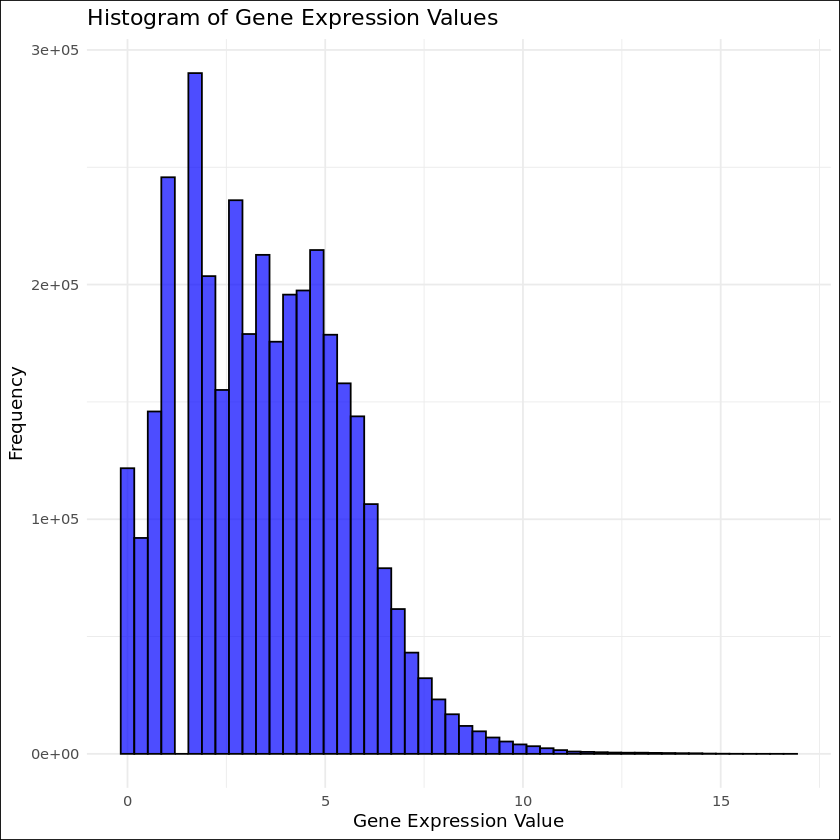

In [22]:
# Melt the data to long format for ggplot2
data_long <- melt(data, id.vars = c("GeneID", "GeneName"))

# Create the plot
plot <- ggplot(data_long, aes(value)) +
  geom_histogram(bins = 50, fill = "blue", alpha = 0.7, color = "black") +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "white")) +  
  labs(x = "Gene Expression Value", y = "Frequency",
       title = "Histogram of Gene Expression Values")

# Save the plot to a file
ggsave("../figures/histogram_gene_expression_values.png", plot)

plot

# Generating heatmap

In [23]:
# Create a color palette for the heatmap
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 255)

# Computer expression matrix
expression_matrix <- df_subset %>%
  group_by(Region, GeneName) %>%
  summarise(Expression = mean(Expression, na.rm = TRUE), .groups = "drop") %>%
  spread(key = Region, value = Expression)

# Create heatmap and save it directly
pheatmap(
  as.matrix(expression_matrix[,-1]), 
  labels_row = expression_matrix$GeneName,
  color = my_palette,
  cluster_rows = TRUE, 
  cluster_cols = TRUE,
  filename = "../figures/heatmap_gene_region.png",
  width = 10,
  height = 8,
  cellwidth = 20,
  cellheight = 10,
  bg = "white"  
)

In [24]:
# Create a color palette for the heatmap
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 255)

# Computer expression matrix
expression_matrix <- df_subset %>%
  group_by(NumericWeeks, GeneName) %>%
  summarise(Expression = mean(Expression, na.rm = TRUE), .groups = "drop") %>%
  spread(key = NumericWeeks, value = Expression)

# Create heatmap and save it directly
pheatmap(
  as.matrix(expression_matrix[,-1]), 
  labels_row = expression_matrix$GeneName,
  color = my_palette,
  cluster_rows = TRUE, 
  cluster_cols = TRUE,
  filename = "../figures/heatmap_gene_weeks.png",
  width = 10,
  height = 8,
  cellwidth = 20,
  cellheight = 10,
  bg = "white"  
)

# Exploring patterns in gene expression across different brain regions and weeks

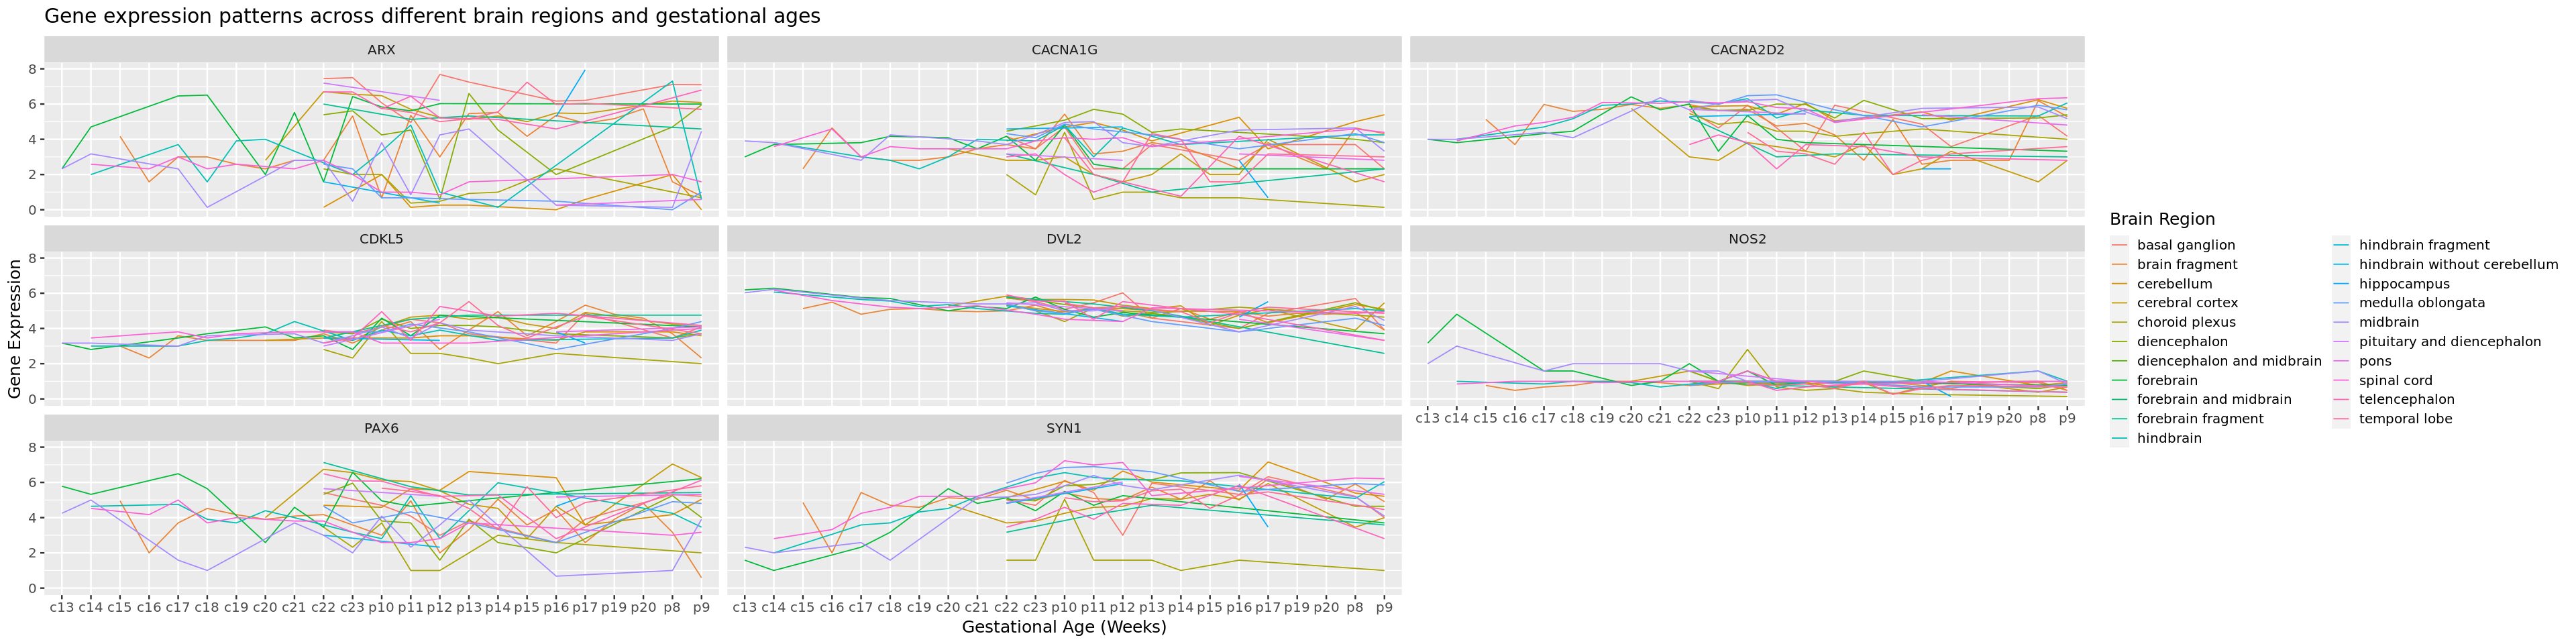

In [25]:
theme_set(theme_gray(base_size = 15))  # increase base font size
options(repr.plot.width = 32, repr.plot.height = 8)  # adjust plot size

df_subset %>%
  ggplot(aes(x = NumericWeeks, y = Expression, color = Region, group = interaction(GeneName, Region))) +
  geom_line() +
  facet_wrap(~GeneName) +
  labs(x = "Gestational Age (Weeks)", 
       y = "Gene Expression", 
       color = "Brain Region", 
       title = "Gene expression patterns across different brain regions and gestational ages")

ggsave("../figures/expression_weeks_vs_region.png", width = 30, height = 5, dpi = 300)

Some insights about the dataset:
*  The earlier stages of Carnegie (Carnegie 1 to 12) primarily focus on very early embryonic development, such as the formation of the neural tube and major organ systems. These stages may not be as relevant for this dataset, which specifically focuses on gene expression in different brain regions.
* Carnegie Stage 13 and 23 correspond to approximately 5-6 and early 8 weeks post-conception, respectively.
* The dataset is only up to 20 weeks post-conception, possibly due to the focus of the study that has collected it.

From the plots, we see:
* Some genes in certain brain regions have no expression prior to Carnegie Stage 22 (c22 in the plot), which suggests that those genes may not be actively involved in the development of those brain regions during the earlier stages. It could indicate that their expression and contribution to those brain regions occur later in development or in a more limited and specific manner. It would be interesting to understand the specific roles and functions of those genes in brain development and why their expression may be absent or low in those particular brain regions at earlier stages.
* When expressions for different brain regions in different genes are mostly unchanged over different ages, it suggests stable gene expression patterns throughout development. Peaks and drops in expression for certain genes indicate dynamic regulation and potential involvement in specific developmental processes or critical periods within those brain regions at specific ages.